In [2]:
from callsetmerger.callsetmerger import Readers
from callsetmerger.recordcluster import convert_type_to_idx
import itertools
import pandas as pd
import upsetplot
import matplotlib.pyplot as plt

In [9]:
# Creating a multi index for the Series data structure used by upset plot
idx=pd.MultiIndex.from_tuples(
    list(itertools.product([True,False],
                           repeat=len(convert_type_to_idx.keys()))),
    names=[i.name for i in convert_type_to_idx.keys()])

In [4]:
upset_data = pd.Series(index=idx).fillna(0)
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
while not readers.done:
    # Get mergeable calls
    rc_list = readers.getMergableCalls()
    for rc in rc_list:
        upset_data[rc.GetVcfTypesTuple()] += 1
        pass
    # Move on
    readers.goToNext()

<ipython-input-4-76d144ccc3fc>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data = pd.Series(index=idx).fillna(0)


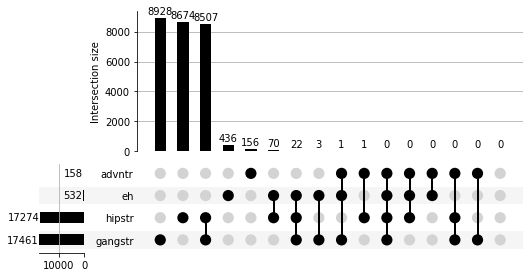

In [5]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data, show_counts='%d', sort_by='cardinality')
plt.show()


In [3]:
# Upset plot for each len(rc_list)
upset_data_rc1 = pd.Series(index=idx).fillna(0)
upset_data_rc2 = pd.Series(index=idx).fillna(0)
upset_data_rc3 = pd.Series(index=idx).fillna(0)
upset_data_rc4 = pd.Series(index=idx).fillna(0)
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
while not readers.done:
    # Get mergeable calls
    rc_list = readers.getMergableCalls()
    for rc in rc_list:
        if len(rc_list) == 1:
            upset_data_rc1[rc.GetVcfTypesTuple()] += 1
        elif len(rc_list) == 2:
            upset_data_rc2[rc.GetVcfTypesTuple()] += 1
        elif len(rc_list) == 3:
            upset_data_rc3[rc.GetVcfTypesTuple()] += 1
        elif len(rc_list) >= 4:
            upset_data_rc4[rc.GetVcfTypesTuple()] += 1
        pass
    # Move on
    readers.goToNext()


<ipython-input-3-2744c52551f5>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data_rc1 = pd.Series(index=idx).fillna(0)
<ipython-input-3-2744c52551f5>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data_rc2 = pd.Series(index=idx).fillna(0)
<ipython-input-3-2744c52551f5>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data_rc3 = pd.Series(index=idx).fillna(0)
<ipython-input-3-2744c52551f5>:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data_rc4 = pd.Series(index=idx).fillna(0

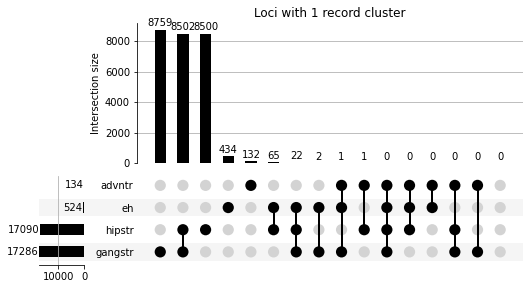

In [5]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data_rc1, show_counts='%d', sort_by='cardinality')
plt.title('Loci with 1 record cluster')
plt.show()

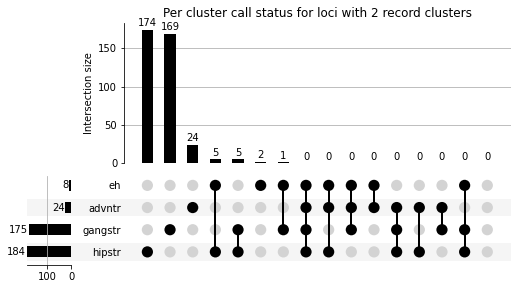

In [16]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data_rc2, show_counts='%d', sort_by='cardinality')
plt.title('Per cluster call status for loci with 2 record clusters')
plt.show()

# Anything more than 2 is zero

In [13]:
# Focusing on 2 record clusters per locus:
upset_data_per_locus_2_cluster = pd.Series(index=idx).fillna(0)
readers = Readers('/home/nmmsv/workspace/analysis/callset_merging/input/advntr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/hipstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/gangstr.chr21.sorted.vcf.gz,/home/nmmsv/workspace/analysis/callset_merging/input/eh.chr21.sorted.vcf.gz'.split(","))
while not readers.done:
    # Get mergeable calls
    rc_list = readers.getMergableCalls()
    if len(rc_list) == 2:
        locus_vcf_types = zip(rc_list[0].GetVcfTypesTuple(), rc_list[1].GetVcfTypesTuple())
        per_locus_call_status = tuple([a or b for a, b in locus_vcf_types])
        upset_data_per_locus_2_cluster[per_locus_call_status] += 1
        pass
    # Move on
    readers.goToNext()




<ipython-input-13-5a8892eeff24>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upset_data_per_locus_2_cluster = pd.Series(index=idx).fillna(0)


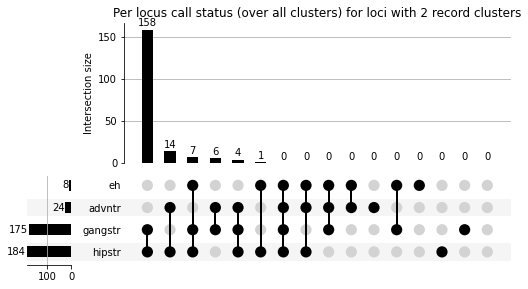

In [15]:
plt.style.use({'figure.facecolor':'white'})
upsetplot.plot(upset_data_per_locus_2_cluster, show_counts='%d', sort_by='cardinality')
plt.title('Per locus call status (over all clusters) for loci with 2 record clusters')
plt.show()